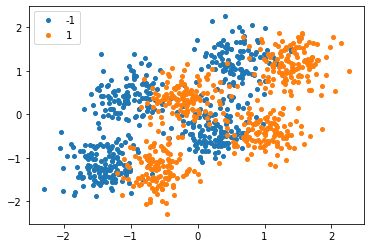

In [8]:
import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid


train_mat = spio.loadmat('dados_treinamento.mat')

X_train = train_mat['X']
y_train = train_mat['y']

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
# ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=8, label=name)
ax.legend(numpoints=1, loc='upper left')

plt.show()


In [9]:
%matplotlib inline

import tensorflow as tf
import scipy.io as spio
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


train_mat = spio.loadmat('dados_treinamento.mat')

x_train = train_mat['X']
y_train = train_mat['y']

# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

validation_mat = spio.loadmat('dados_val.mat')
x_val = validation_mat['Xval']
y_val = validation_mat['yval']
y_val = encoder.transform(y_val)

# x_train, x_val, y_train, y_val = train_test_split(
#     x_train, y_train, test_size=0.3, random_state=0)


test_mat = spio.loadmat('dados_val.mat')
x_test = test_mat['Xval']
y_test = test_mat['yval']
y_test = encoder.transform(y_test)

testes_neuronios=[]
# for k in range(200,201,10):
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, kernel_initializer='normal', activation='relu'), #relu, linear, sigmoid
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid')
])

model.compile(loss='binary_crossentropy', #binary_crossentropy, mean_absolute_error, 
              optimizer='adam', # sgd, rmsprop, adagrad, adadelta, adam 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)
loss, accuracy = model.evaluate(x_val, y_val)
# testes_neuronios.append({'n':k, 'loss':loss, 'accuracy':accuracy})
# print(testes_neuronios)

/home/intelie/anaconda3/envs/Tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/intelie/anaconda3/envs/Tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/intelie/anaconda3/envs/Tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/intelie/anaconda3/envs/Tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWar

Instructions for updating:
Colocations handled automatically by placer.
Train on 1000 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6736 - acc: 0.6430 - val_loss: 0.6562 - val_acc: 0.5530
Epoch 2/200
1000/1000 [==============================] - 0s 140us/sample - loss: 0.6328 - acc: 0.5860 - val_loss: 0.6204 - val_acc: 0.5590
Epoch 3/200
1000/1000 [==============================] - 0s 136us/sample - loss: 0.5971 - acc: 0.5880 - val_loss: 0.5931 - val_acc: 0.6060
Epoch 4/200
1000/1000 [==============================] - 0s 138us/sample - loss: 0.5747 - acc: 0.6330 - val_loss: 0.5756 - val_acc: 0.6410
Epoch 5/200
1000/1000 [==============================] - 0s 162us/sample - loss: 0.5614 - acc: 0.6500 - val_loss: 0.5673 - val_acc: 0.6520
Epoch 6/200
1000/1000 [==============================] - 0s 296us/sample - loss: 0.5536 - acc: 0.6710 - val_loss: 0.5610 - val_acc: 0.6540


Epoch 55/200
1000/1000 [==============================] - 0s 213us/sample - loss: 0.3121 - acc: 0.8820 - val_loss: 0.3429 - val_acc: 0.8610
Epoch 56/200
1000/1000 [==============================] - 0s 119us/sample - loss: 0.3115 - acc: 0.8790 - val_loss: 0.3423 - val_acc: 0.8640
Epoch 57/200
1000/1000 [==============================] - 0s 312us/sample - loss: 0.3094 - acc: 0.8800 - val_loss: 0.3409 - val_acc: 0.8620
Epoch 58/200
1000/1000 [==============================] - 0s 335us/sample - loss: 0.3089 - acc: 0.8810 - val_loss: 0.3411 - val_acc: 0.8600
Epoch 59/200
1000/1000 [==============================] - 0s 231us/sample - loss: 0.3082 - acc: 0.8800 - val_loss: 0.3393 - val_acc: 0.8620
Epoch 60/200
1000/1000 [==============================] - 0s 198us/sample - loss: 0.3063 - acc: 0.8790 - val_loss: 0.3380 - val_acc: 0.8600
Epoch 61/200
1000/1000 [==============================] - 0s 177us/sample - loss: 0.3056 - acc: 0.8790 - val_loss: 0.3369 - val_acc: 0.8610
Epoch 62/200
1000/10

1000/1000 [==============================] - 0s 177us/sample - loss: 0.2894 - acc: 0.8820 - val_loss: 0.3277 - val_acc: 0.8650
Epoch 114/200
1000/1000 [==============================] - 0s 205us/sample - loss: 0.2896 - acc: 0.8810 - val_loss: 0.3308 - val_acc: 0.8600
Epoch 115/200
1000/1000 [==============================] - 0s 180us/sample - loss: 0.2904 - acc: 0.8820 - val_loss: 0.3261 - val_acc: 0.8660
Epoch 116/200
1000/1000 [==============================] - 0s 128us/sample - loss: 0.2892 - acc: 0.8830 - val_loss: 0.3276 - val_acc: 0.8600
Epoch 117/200
1000/1000 [==============================] - 0s 99us/sample - loss: 0.2889 - acc: 0.8820 - val_loss: 0.3290 - val_acc: 0.8650
Epoch 118/200
1000/1000 [==============================] - 0s 122us/sample - loss: 0.2886 - acc: 0.8770 - val_loss: 0.3270 - val_acc: 0.8620
Epoch 119/200
1000/1000 [==============================] - 0s 177us/sample - loss: 0.2877 - acc: 0.8830 - val_loss: 0.3269 - val_acc: 0.8640
Epoch 120/200
1000/1000 [===

1000/1000 [==============================] - 0s 223us/sample - loss: 0.2843 - acc: 0.8820 - val_loss: 0.3260 - val_acc: 0.8630
Epoch 172/200
1000/1000 [==============================] - 0s 272us/sample - loss: 0.2842 - acc: 0.8830 - val_loss: 0.3250 - val_acc: 0.8650
Epoch 173/200
1000/1000 [==============================] - 0s 249us/sample - loss: 0.2826 - acc: 0.8840 - val_loss: 0.3273 - val_acc: 0.8640
Epoch 174/200
1000/1000 [==============================] - 0s 187us/sample - loss: 0.2832 - acc: 0.8830 - val_loss: 0.3258 - val_acc: 0.8630
Epoch 175/200
1000/1000 [==============================] - 0s 165us/sample - loss: 0.2826 - acc: 0.8820 - val_loss: 0.3272 - val_acc: 0.8590
Epoch 176/200
1000/1000 [==============================] - 0s 153us/sample - loss: 0.2826 - acc: 0.8830 - val_loss: 0.3262 - val_acc: 0.8630
Epoch 177/200
1000/1000 [==============================] - 0s 151us/sample - loss: 0.2833 - acc: 0.8800 - val_loss: 0.3269 - val_acc: 0.8640
Epoch 178/200
1000/1000 [==

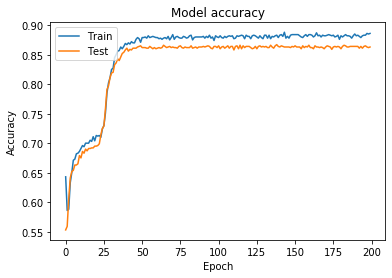

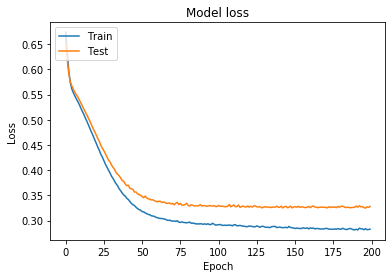

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

* Plotar as regiões de decisão
    * https://www.kaggle.com/arthurtok/decision-boundaries-visualised-via-python-plotly 
* early stopping: https://www.tensorflow.org/tutorials/keras/basic_regression?hl=pt_BR#train_the_model
#### a) 
* plote curva de evolução do valor
* aplicar holdout
* explicar escolhas de parâmetros
* plotar evolução do custo em relação ao conjunto de validação
* plotar conjunto de validação/conjunto de treinamento
    * separar conjunto de validação/treinamento antes
#### b) 
* plotar região de decisão

#### c)
* 
#### d)
#### e)
#### f)
#### g)

#### b)



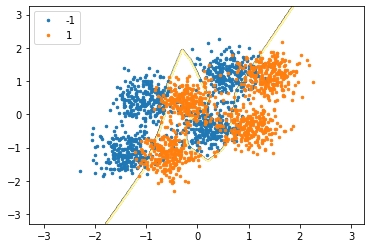

In [11]:
# -*- coding: utf-8 -*-

import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid

train_mat = spio.loadmat('dados_treinamento.mat')
test_mat = spio.loadmat('dados_val.mat')

X_train = np.concatenate((train_mat['X'], test_mat['Xval']))
y_train = np.concatenate((train_mat['y'], test_mat['yval']))

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
# ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', markersize=5, linestyle='', label=name)
ax.legend(numpoints=1, loc='upper left')

# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
fig = plt.show()

#### c)

In [12]:

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# decision = lambda x: -1 if x<0 else 1
# pred = np.array([decision(x) for x in model.predict(x_train)])
pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test, pred))

[[414  67]
 [ 70 449]]
0.863


#### d)

#### e)

In [26]:
%matplotlib inline

import scipy.io as spio
from sklearn.preprocessing import Binarizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


train_mat = spio.loadmat('dados_treinamento.mat')

x_train = train_mat['X']
y_train = train_mat['y']

from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel='poly', degree=5)

clf.fit(x_train, y_train)

pred = clf.predict(x_train)
cm = confusion_matrix(y_train, pred)
print(cm)
print(accuracy_score(y_train, pred))


[[447  63]
 [169 321]]
0.768


/home/intelie/anaconda3/envs/Tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


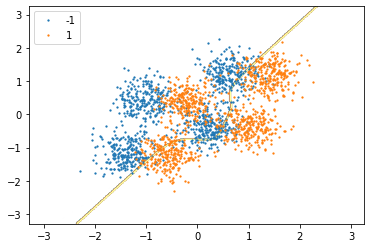

In [27]:
# -*- coding: utf-8 -*-

import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid

train_mat = spio.loadmat('dados_treinamento.mat')
test_mat = spio.loadmat('dados_val.mat')

X_train = np.concatenate((train_mat['X'], test_mat['Xval']))
y_train = np.concatenate((train_mat['y'], test_mat['yval']))

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
# ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', markersize=2.5, linestyle='', label=name)
ax.legend(numpoints=1, loc='upper left')

# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
fig = plt.show()

#### f)

In [83]:
test_mat = spio.loadmat('dados_val.mat')
x_test = test_mat['Xval']
y_test = test_mat['yval']

pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test, pred))

[[403  78]
 [ 76 443]]
0.846
